# Sentiment Analysis on Movie Reviews

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import * 

## Preparing the data

In [3]:
path = Path('data/Kaggle Movie Review/')

In [4]:
path.ls()

[PosixPath('data/Kaggle Movie Review/sampleSubmission.csv'),
 PosixPath('data/Kaggle Movie Review/data_save.pkl'),
 PosixPath('data/Kaggle Movie Review/testData.tsv'),
 PosixPath('data/Kaggle Movie Review/imdb_master.csv'),
 PosixPath('data/Kaggle Movie Review/labeledTrainData.tsv'),
 PosixPath('data/Kaggle Movie Review/labeledTrainData.csv'),
 PosixPath('data/Kaggle Movie Review/tmp.pth'),
 PosixPath('data/Kaggle Movie Review/unlabeledTrainData.tsv'),
 PosixPath('data/Kaggle Movie Review/data_lm.pkl')]

Download training set

In [5]:
df_train = pd.read_csv(path/'labeledTrainData.tsv', sep='\t')
df_train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [6]:
df_train.shape

(25000, 3)

In [7]:
df_train['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [8]:
df_train['review'][1]

'\\The Classic War of the Worlds\\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells\' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \\"critics\\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \\"critics\\". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells\' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \\"critics\\" perceive to be its shortcomings."'

Download test set

In [9]:
df_test = pd.read_csv(path/'testData.tsv', sep='\t')
df_test.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


In [10]:
df_test.shape

(25000, 2)

In [11]:
df_test['review'][1]

"This movie is a disaster within a disaster film. It is full of great action scenes, which are only meaningful if you throw away all sense of reality. Let's see, word to the wise, lava burns you; steam burns you. You can't stand next to lava. Diverting a minor lava flow is difficult, let alone a significant one. Scares me to think that some might actually believe what they saw in this movie.<br /><br />Even worse is the significant amount of talent that went into making this film. I mean the acting is actually very good. The effects are above average. Hard to believe somebody read the scripts for this and allowed all this talent to be wasted. I guess my suggestion would be that if this movie is about to start on TV ... look away! It is like a train wreck: it is so awful that once you know what is coming, you just have to watch. Look away and spend your time on more meaningful content."

Create DataBunch

In [12]:
data_lm = TextDataBunch.from_df(path, df_train, df_test)

/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
4079_8, 605_10, 4983_1, 6353_7, 9834_1...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [13]:
data_lm.save()

In [14]:
data = load_data(path)

### Tokenization

In [15]:
data = TextClasDataBunch.from_df(path, df_train, df_test)
data.show_batch()

/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
4079_8, 605_10, 4983_1, 6353_7, 9834_1...
  if getattr(ds, 'warn', False): warn(ds.warn)


text,target
xxbos 0,4405_2
xxbos 1,8597_9
xxbos 0,10898_3
xxbos 0,6242_1
xxbos 1,3246_9


### Numericalization

In [16]:
# see first 10 unique list of all of the possible tokens
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '1']

In [17]:
data.train_ds[0][0]

Text xxbos 1

In [18]:
# replace movie review with a list of numbers. Where is the token in the vocab?
data.train_ds[0][0].data[:10]

array([2, 9])

### With the data block API

In [19]:
data = (TextList.from_df(df_train, cols='review')
        .split_by_rand_pct(0.1)
        .label_for_lm()
        .databunch(bs=32))
data.show_batch()

idx,text
0,"whether he is guilty or innocent . xxmaj moonwalker is part biography , part feature film which i remember going to see at the cinema when it was originally released . xxmaj some of it has subtle messages about xxup mj 's feeling towards the press and also the obvious message of drugs are bad xxunk . \n \n xxmaj visually impressive but of course this is all about"
1,"up capturing xxup c.a. within hours of his release from prison . xxmaj this leaves only the xxmaj mystery xxmaj men to stop xxmaj frankenstein 's evil plan , but with such henchmen as the xxmaj disco xxmaj boys protecting xxmaj frankenstein , the trio are going to need a little help . \n \n xxmaj recruiting commences , and after a painful recruitment party , the team settles"
2,"we would n't want to take time away from our next match which saw real life husband and wife xxmaj marc xxmaj xxunk and xxmaj sable defeat xxmaj xxunk and xxmaj luna xxmaj xxunk in the first mixed tag match at xxmaj wrestlemania in 8 years . xxmaj and , in all honesty , it was n't worth the wait . xxmaj while not terrible , the match was in"
3,"improvement on it . i have no idea why xxmaj scorsese wasted his time on a remake . xxmaj then again , considering how bad his recent movies have been ( i 'm referring to his dull xxmaj buddhist movie and all the ones with his new favourite actress , the blond girl xxmaj di xxmaj caprio ) this is n't even that bad by comparison . xxmaj and considering"
4,"but toward the end one understands there is not much to understand . \ xxmaj scary "" elements seems sometimes to have been added to the script without reason ... \n \n xxmaj so ... ( yawn ) xxmaj see this movie it if you have nothing more interesting to do , like cutting the carrots or looking at the clouds . "" xxbos \ a xxmaj gentleman 's"


### Language Model

In [20]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.3)

In [21]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


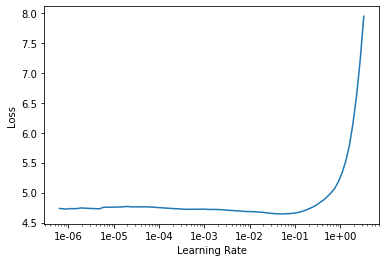

In [22]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(1, 1e-2, moms = (0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.172768,4.023616,0.292196,05:44


In [25]:
learn.save('fit_head')

In [26]:
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (22500 items)
x: LMTextList
xxbos xxmaj with all this stuff going down at the moment with xxup mj i 've started listening to his music , watching the odd documentary here and there , watched xxmaj the xxmaj wiz and watched xxmaj moonwalker again . xxmaj maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent . xxmaj moonwalker is part biography , part feature film which i remember going to see at the cinema when it was originally released . xxmaj some of it has subtle messages about xxup mj 's feeling towards the press and also the obvious message of drugs are bad xxunk . 
 
  xxmaj visually impressive but of course this is all about xxmaj michael xxmaj jackson so unless you remotely like xxup mj in anyway then you are going to hate this and find it boring . xxmaj some may call xxup mj an egotist for consenting to the maki

In [27]:
# unfreeze and train the whole thing.
learn.unfreeze()

In [28]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.220889,4.197977,0.275919,05:50
1,4.311581,4.262852,0.270777,05:50
2,4.164465,4.103705,0.285325,05:50
3,3.923187,3.944425,0.303556,05:50
4,3.680363,3.905147,0.308927,05:50


In [29]:
learn.save('fine_tuned')

In [30]:
learn.load('fine_tuned')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (22500 items)
x: LMTextList
xxbos xxmaj with all this stuff going down at the moment with xxup mj i 've started listening to his music , watching the odd documentary here and there , watched xxmaj the xxmaj wiz and watched xxmaj moonwalker again . xxmaj maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent . xxmaj moonwalker is part biography , part feature film which i remember going to see at the cinema when it was originally released . xxmaj some of it has subtle messages about xxup mj 's feeling towards the press and also the obvious message of drugs are bad xxunk . 
 
  xxmaj visually impressive but of course this is all about xxmaj michael xxmaj jackson so unless you remotely like xxup mj in anyway then you are going to hate this and find it boring . xxmaj some may call xxup mj an egotist for consenting to the maki

In [31]:
learn.save_encoder('fine_tuned_enc')

### Classifier

In [32]:
test_data = TextList.from_df(df_test, cols='review', vocab=data.vocab)

data_clas = (TextList.from_df(df_train, cols='review', vocab=data.vocab)
             .split_by_rand_pct(0.2)
             .label_from_df(cols = 'sentiment')
             .add_test(test_data)        
             .databunch(bs=32))

data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,1
"xxbos * ! ! - xxup spoilers - ! ! * \n \n xxmaj before i begin this , let me say that i have had both the advantages of seeing this movie on the big screen and of having seen the \ xxmaj authorized xxmaj version "" of this movie , remade by xxmaj stephen xxmaj king , himself , in 1997 . \n \n xxmaj both",1
"xxbos xxmaj heavy - handed xxunk . xxmaj writers using characters as xxunk to speak for themselves . xxmaj predictable , plodding plot points ( say that five times fast ) . a child 's imitation of xxmaj britney xxmaj spears . xxmaj this film has all the earmarks of a xxmaj lifetime xxmaj special reject . \n \n i honestly believe that xxmaj jesus xxmaj xxunk and xxmaj",0
"xxbos xxmaj prior to this release , xxmaj neil labute had this to say about the 1973 original : \ xxmaj it 's surprising how many people say it 's their favorite soundtrack . i 'm like , come on ! xxmaj you may not like the new one , but if that 's your favorite soundtrack , i do n't know if i * want * you to like",0
"xxbos \ a xxmaj damsel in xxmaj distress "" is definitely not one of xxmaj fred xxmaj astaire 's better musicals . xxmaj but even xxmaj astaire 's bad films always had some good moments . \n \n xxmaj in "" xxmaj damsel , "" xxmaj astaire is xxmaj jerry xxmaj halliday , an xxmaj american musical star who is in xxmaj london on a personal appearance tour .",0


In [33]:
learn_classifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult = 0.5)
learn_classifier.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (20000 items)
x: TextList
xxbos xxmaj with all this stuff going down at the moment with xxup mj i 've started listening to his music , watching the odd documentary here and there , watched xxmaj the xxmaj wiz and watched xxmaj moonwalker again . xxmaj maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent . xxmaj moonwalker is part biography , part feature film which i remember going to see at the cinema when it was originally released . xxmaj some of it has subtle messages about xxup mj 's feeling towards the press and also the obvious message of drugs are bad xxunk . 
 
  xxmaj visually impressive but of course this is all about xxmaj michael xxmaj jackson so unless you remotely like xxup mj in anyway then you are going to hate this and find it boring . xxmaj some may call xxup mj an egotist for consenting to the making of

In [34]:
learn_classifier.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


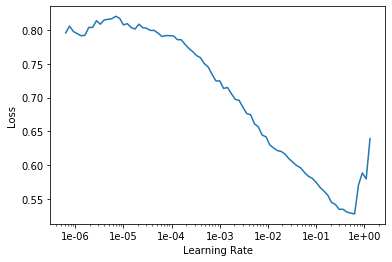

In [35]:
learn_classifier.recorder.plot()

In [36]:
# moms = (0.8, 0.7) - helps with training when decreasing the momentum. 
learn_classifier.fit_one_cycle(1, 5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.313663,0.255697,0.895800,03:45


89.6% accuracy!

In [37]:
learn_classifier.save('first')

In [38]:
learn_classifier.load('first');

In [39]:
learn_classifier.freeze_to(-2)
learn_classifier.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.281421,0.228812,0.905200,03:46


90.5% accuracy!

In [40]:
learn_classifier.save('second')

In [41]:
learn_classifier.load('second');

In [42]:
learn_classifier.freeze_to(-3)
learn_classifier.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.251465,0.213108,0.913800,03:47


91.4% accuracy!

In [43]:
learn_classifier.save('third')

In [44]:
learn_classifier.load('third');

In [45]:
learn_classifier.unfreeze()
learn_classifier.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.227948,0.210675,0.914400,03:48
1,0.247658,0.208784,0.916600,03:47


91.6% accuracy!

In [46]:
learn_classifier.show_results()

text,target,prediction
"xxbos xxmaj warning : xxmaj does contain spoilers . \n \n xxmaj open xxmaj your xxmaj eyes \n \n xxmaj if you have not seen this film and plan on doing so , just stop reading here and take my word for it . xxmaj you have to see this film . i have seen it four times so far and i still have n't made up my",1,1
"xxbos xxmaj this movie was recently released on xxup dvd in the xxup us and i finally got the chance to see this hard - to - find gem . xxmaj it even came with original theatrical previews of other xxmaj italian horror classics like \ xxup xxunk "" and "" xxup beyond xxup the xxup darkness "" . xxmaj unfortunately , the previews were the best thing about this",0,0
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of oatmeal . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",0,0
"xxbos xxmaj here are the matches . . . ( xxunk . = advantage ) \n \n xxmaj the xxmaj warriors ( xxmaj ultimate xxmaj warrior , xxmaj texas xxmaj tornado and xxmaj legion of xxmaj doom ) v xxmaj the xxmaj perfect xxmaj team ( xxmaj mr xxmaj perfect , xxmaj ax , xxmaj smash and xxmaj crush of xxmaj demolition ) : xxmaj ax is the first",0,0
"xxbos xxmaj jim xxmaj carrey is back to much the same role that he played in xxmaj the xxmaj mask , a timid guy who is trying to get ahead in the world but who seems to be plagued with bad luck . xxmaj even when he tries to help a homeless guy from being harassed by a bunch of hoodlums ( and of course they have to be xxmaj",1,1


In [47]:
learn_classifier.predict("I really loved that movie, it was awesome!")

(Category 1, tensor(1), tensor([5.0688e-04, 9.9949e-01]))

In [48]:
learn_classifier.predict("That was a great movie!")

(Category 1, tensor(1), tensor([0.0017, 0.9983]))